**Ex-1: Implementation of classification using MLP**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

X /= 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter = 10, random_state=42)

mlp.fit(X_train, y_train)
predictions = mlp.predict(X_test)

conf_matrix = confusion_matrix(y_test, predictions)
print(conf_matrix)
print(classification_report(y_test, predictions))

plt.figure(figsize = (10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

**Ex-2: Understanding of Deep learning Packages Basics: Tensorflow,
Keras, Theano and PyTorch.**

In [ ]:
!pip install tensorflow theano torch

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
model = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=(28, 28)),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

!pip install --upgrade numpy==1.20.3
import numpy as np
import theano
import theano.tensor as T

x = T.dscalar('x')
y = T.dscalar('y')
z = x + y

addition = theano.function([x, y], z)

result = addition(2.5, 3.7)
print("Result:", result)


import torch

t1=torch.tensor([1, 2, 3, 4])
t2=torch.tensor([[1, 2, 3, 4],
[5, 6, 7, 8],
[9, 10, 11, 12]])

print("Tensor t1: \n", t1)
print("\nTensor t2: \n", t2)

print("\nRank of t1: ", len(t1.shape))
print("Rank of t2: ", len(t2.shape))

print("\nRank of t1: ", t1.shape)
print("Rank of t2: ", t2.shape)

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2905 - accuracy: 0.9151
Epoch 2/5
 928/1875 [=============>................] - ETA: 7s - loss: 0.1461 - accuracy: 0.9581

In [ ]:
!pip install theano

**Ex-3: Improve the performance of Deep learning models with Hyper-Parameter Tuning.**

In [ ]:
!pip install scikeras

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split, GridSearchCV
from scikeras.wrappers import KerasClassifier
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def create_model(learning_rate=0.01, num_units=64):
  model = keras.Sequential([
  keras.layers.Dense(units=num_units, activation='relu',
  input_shape=(X_train.shape[1],)),
  keras.layers.Dense(units=num_units, activation='relu'),
  keras.layers.Dense(units=3, activation='softmax') # Multi-class classification
  ])
  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=create_model, epochs=5, batch_size=10)
# layers = [[32], (64, 32), (128, 64, 32)]

param_grid = dict(
learning_rate = [0.001, 0.01, 0.1],
num_units = [32, 64, 128])

grid_search = GridSearchCV(estimator=model, param_grid = param_grid, cv=3, verbose=1)
grid_result = grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_result.best_params_}")
print(f"Best Accuracy: {grid_result.best_score_}")

best_model = grid_result.best_estimator_.model
best_model.fit(X_train, y_train, epochs=30, batch_size=32)

test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

**Ex-4: Optimization techniques of Gradient Descent(GD),Momentum Based GD,Nesterov Accelerated GD,Stochastic GD,AdaGrad,RMSProp,Adam**

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train, X_test = X_train / 255.0, X_test / 255.0

def create_model(optimizer):
  model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
  ])
  model.compile(optimizer=optimizer,
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])
  return model

optimizers = {
'SGD': tf.keras.optimizers.SGD(learning_rate=0.01),
'Momentum': tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
'Nesterov': tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
'AdaGrad': tf.keras.optimizers.Adagrad(learning_rate=0.01),
'RMSProp': tf.keras.optimizers.RMSprop(learning_rate=0.001),
'Adam': tf.keras.optimizers.Adam(learning_rate=0.001)
}

accuracy_history = {}

num_epochs = 5
for optimizer_name, optimizer in optimizers.items():
  model = create_model(optimizer)
  history = model.fit(X_train, y_train, epochs=num_epochs, verbose=1,
  validation_data=(X_test, y_test))
  accuracy_history[optimizer_name] = history.history['accuracy']

plt.figure(figsize=(10, 6))
for optimizer_name, accuracy_values in accuracy_history.items():
  plt.plot(accuracy_values, label=optimizer_name)
plt.title('Accuracy Curves for Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Ex-5: Implementing of Denoising, sparse and contractive autoencoders.**

In [ ]:
import numpy
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape
X_test.shape
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.show()

X_train.shape
X_test.shape
num_pixels = X_train.shape[0] * X_train.shape[1]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_train = X_train / 255
X_test = X_test / 255
X_train.shape
X_test.shape

noise_factor = 0.2
x_train_noisy = X_train + noise_factor * numpy.random.normal(loc=0.0, scale=1.0 , size=X_train.shape)
x_test_noisy = X_test + noise_factor * numpy.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
x_train_noisy = numpy.clip(x_train_noisy, 0., 1.)
x_test_noisy = numpy.clip(x_test_noisy, 0., 1.)

model = Sequential()
model.add(Dense(500, input_dim=num_pixels, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(784, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(x_train_noisy, X_train, validation_data=(x_test_noisy, X_test), epochs=2 , batch_size=200)

pred = model.predict(x_test_noisy)
pred.shape
X_test.shape

X_test = numpy.reshape(X_test, (10000,28,28)) * 255
pred = numpy.reshape(pred, (10000,28,28)) *255
x_test_noisy = numpy.reshape(x_test_noisy, (-1,28,28)) *255
plt.figure(figsize=(20, 4))
print("Test Images")

for i in range(10,20,1):
  plt.subplot(2, 10, i+1)
  plt.imshow(X_test[i,:,:], cmap='gray')
curr_lbl = y_test[i]
plt.title("(Label: " + str(curr_lbl) + ")")
plt.show()

plt.figure(figsize=(20, 4))
print("Test Images with Noise")
for i in range(10,20,1):
  plt.subplot(2, 10, i+1)
  plt.imshow(x_test_noisy[i,:,:], cmap='gray')
plt.show()

plt.figure(figsize=(20, 4))
print("Reconstruction of Noisy Test Images")
for i in range(10,20,1):
  plt.subplot(2, 10, i+1)
  plt.imshow(pred[i,:,:], cmap='gray')
plt.show()

**Ex-6: performance of the model using various Regularization Techniques.**

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4673 - accuracy: 0.8780
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3038 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2834 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2730 - accuracy: 0.9244
Epoch 5/5
313/313 [==============================] - 1s 3ms/step
Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3007 - accuracy: 0.9192
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1533 - accuracy: 0.9621
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1216 - accuracy: 0.9720
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1070 - accuracy: 0.9774
Epoch 5/5
313/313 [==============================] - 1s 2ms/st

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0858 - accuracy: 0.9734
Epoch 2/5
1858/1875 [============================>.] - ETA: 0s - loss: 0.0795 - accuracy: 0.9742

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0796 - accuracy: 0.9742
Epoch 3/5
1860/1875 [============================>.] - ETA: 0s - loss: 0.0716 - accuracy: 0.9774

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0714 - accuracy: 0.9775
Epoch 4/5
1869/1875 [============================>.] - ETA: 0s - loss: 0.0675 - accuracy: 0.9783

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0675 - accuracy: 0.9783
Epoch 5/5
1863/1875 [============================>.] - ETA: 0s - loss: 0.0639 - accuracy: 0.9794

313/313 [==============================] - 1s 2ms/step - loss: 0.0832 - accuracy: 0.9769


[0.08323051780462265, 0.9768999814987183]

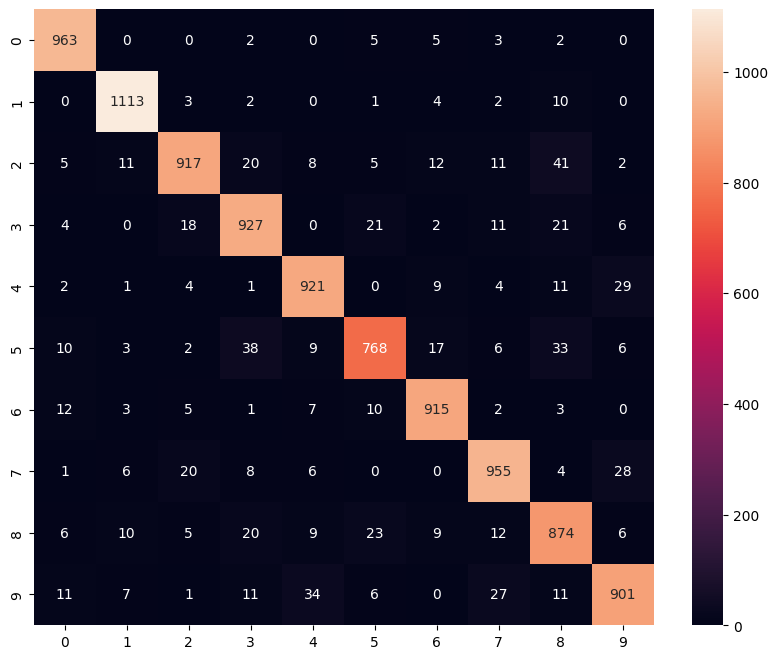

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()
X_train
X_train = X_train / 255
X_test = X_test / 255
X_train_flat = X_train.reshape(len(X_train), 28*28)
X_test_flat = X_test.reshape(len(X_test), 28*28)
X_train_flat.shape

model=keras.Sequential([
keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_flat,y_train,epochs=5)
model.evaluate(X_test_flat,y_test)
y_pred=model.predict(X_test_flat)
y_pred[0]

y_pred_labels=[np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='d')

from keras import regularizers
model1=keras.Sequential([
  keras.layers.Dense(100,input_shape=(784,),activation='relu',kernel_regularizer=regularizers.l2 (0.0001)),
  keras.layers.Dense(10,activation='sigmoid')])
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.fit(X_train_flat,y_train,epochs=5)
model1.evaluate(X_test_flat, y_test)

model2=keras.Sequential([
  keras.layers.Dense(100,input_shape=(784,),activation='relu',kernel_regularizer=regularizers.l1 (0.0001)),
  keras.layers.Dense(10,activation='sigmoid')
])
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.fit(X_train_flat,y_train,epochs=5)

model2.evaluate(X_test_flat,y_test)

from keras.layers import Dropout
model3=keras.Sequential([
  keras.layers.Dense(100,input_shape=(784,),activation='relu'),
  Dropout(0.25),
  keras.layers.Dense(10,activation='sigmoid')
])
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model3.fit(X_train_flat,y_train,epochs=5)
model3.evaluate(X_test_flat,y_test)

from keras.callbacks import EarlyStopping
model3.fit(X_train_flat,y_train,epochs=5,callbacks = [EarlyStopping(monitor='val_acc', patience =2)])
model3.evaluate(X_test_flat,y_test)